# **Importing Dependencies**

In [1]:
from google.colab import drive #Importing drive as the dataset is stored in google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import necessary libraries
import pandas as pd #Used for data analysis (Mainly works with tabular data)
import numpy as np #(Mainly works with numeric data)
import matplotlib.pyplot as plt #Used for data visulaization
import seaborn as sns #Used for data visualization

import warnings
warnings.filterwarnings('ignore') #To supress warnings

# **Reading and understanding the data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CustomerChurn/train.csv', index_col=False) #Loading data set
df.head() #To see first five rows of the dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df.shape

(4250, 20)

In [5]:
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
data = df.drop_duplicates()
print(df.shape)
print(data.shape)

(4250, 20)
(4250, 20)


# **Exploratory Data Analysis**

### **(A) Some high level information**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [8]:
df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


Initial observations about the training data:
___

* Account length varies from 1 to 243 months (~ 20 years).
* 91% customers didn't have an international plan.
* 74% customer didn't opt for voice mail plan.
* 86% customers in the training data didn't change their provider (i.e. no churning).
* Unique values for area_code - Single area code covers multiple states.
* Most of the features seems to be having no missing values.
* Average number of call minutes for day, evening, and night are comparable.
* Even though number of minutes are similar, average charges are different and in decreasing order of day > evening > night (least for night calls).
* International call minutes is very less compared to local calls.

In [9]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [10]:
# How many customers have churned?
print("Total Number of customers that churned: ",data[data['churn']=='yes'].churn.count())

Total Number of customers that churned:  598


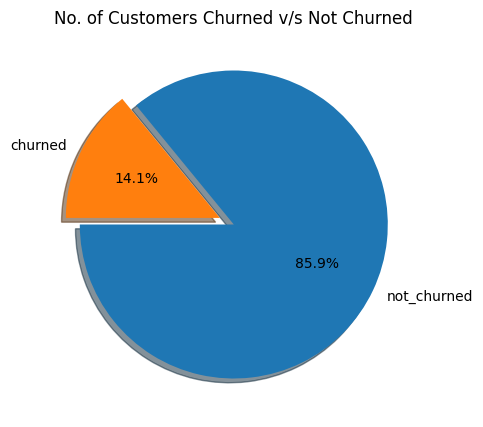

In [11]:
# Checking the Imbalance in Data
not_churned = data[data['churn']=='no']['churn'].count()
churned = data[data['churn']=='yes']['churn'].count()

fig = plt.figure(figsize=(5,5))
plt.pie([not_churned,churned], labels=['not_churned','churned'],explode=(0,0.1),\
        shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

**Observation:**

* There is a significant imbalance in the two classes of data. Only 14.1 % of the total samples belong to the churned class.

### **(B) Distributions for various features to understand the seperation between classes for that feature.**

In [12]:
features = ['account_length','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vmail_messages']

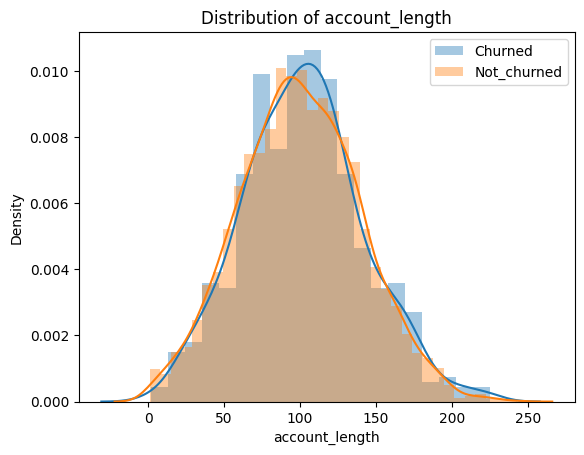

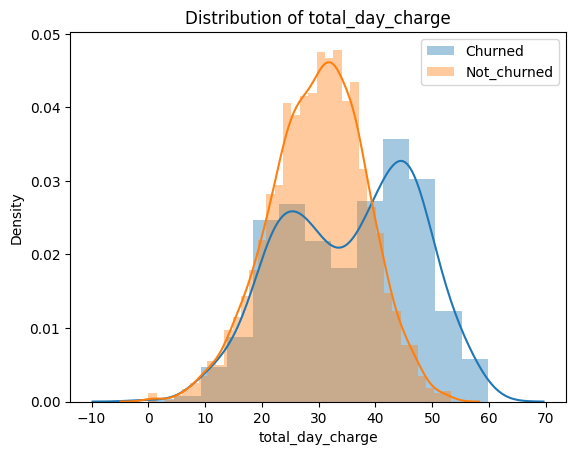

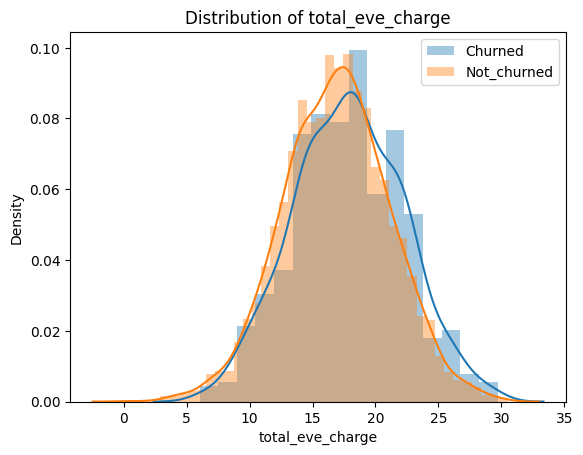

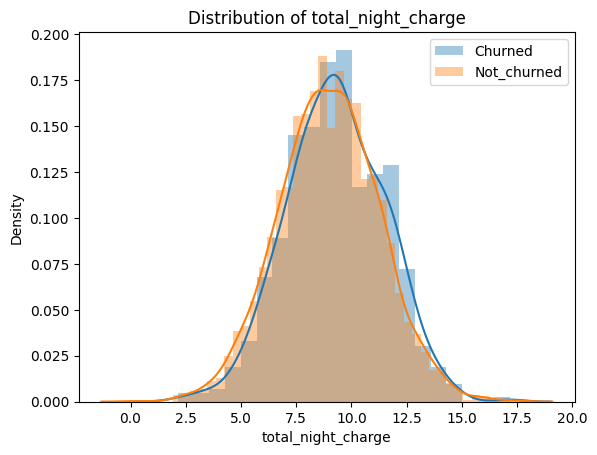

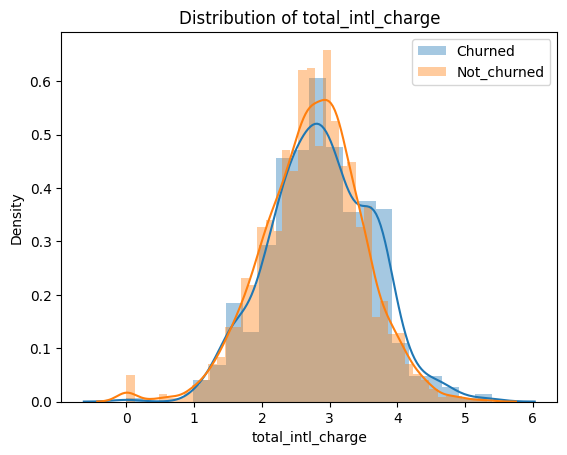

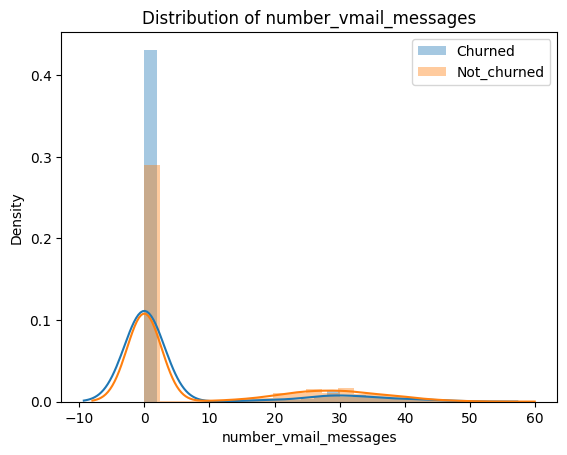

In [13]:
for i in features:
  churned = data[data['churn']=='yes'][i]
  not_churned =data[data['churn']=='no'][i]
  sns.distplot(churned,label='Churned')
  sns.distplot(not_churned,label='Not_churned')
  plt.title('Distribution of '+i)
  plt.legend()
  plt.show()

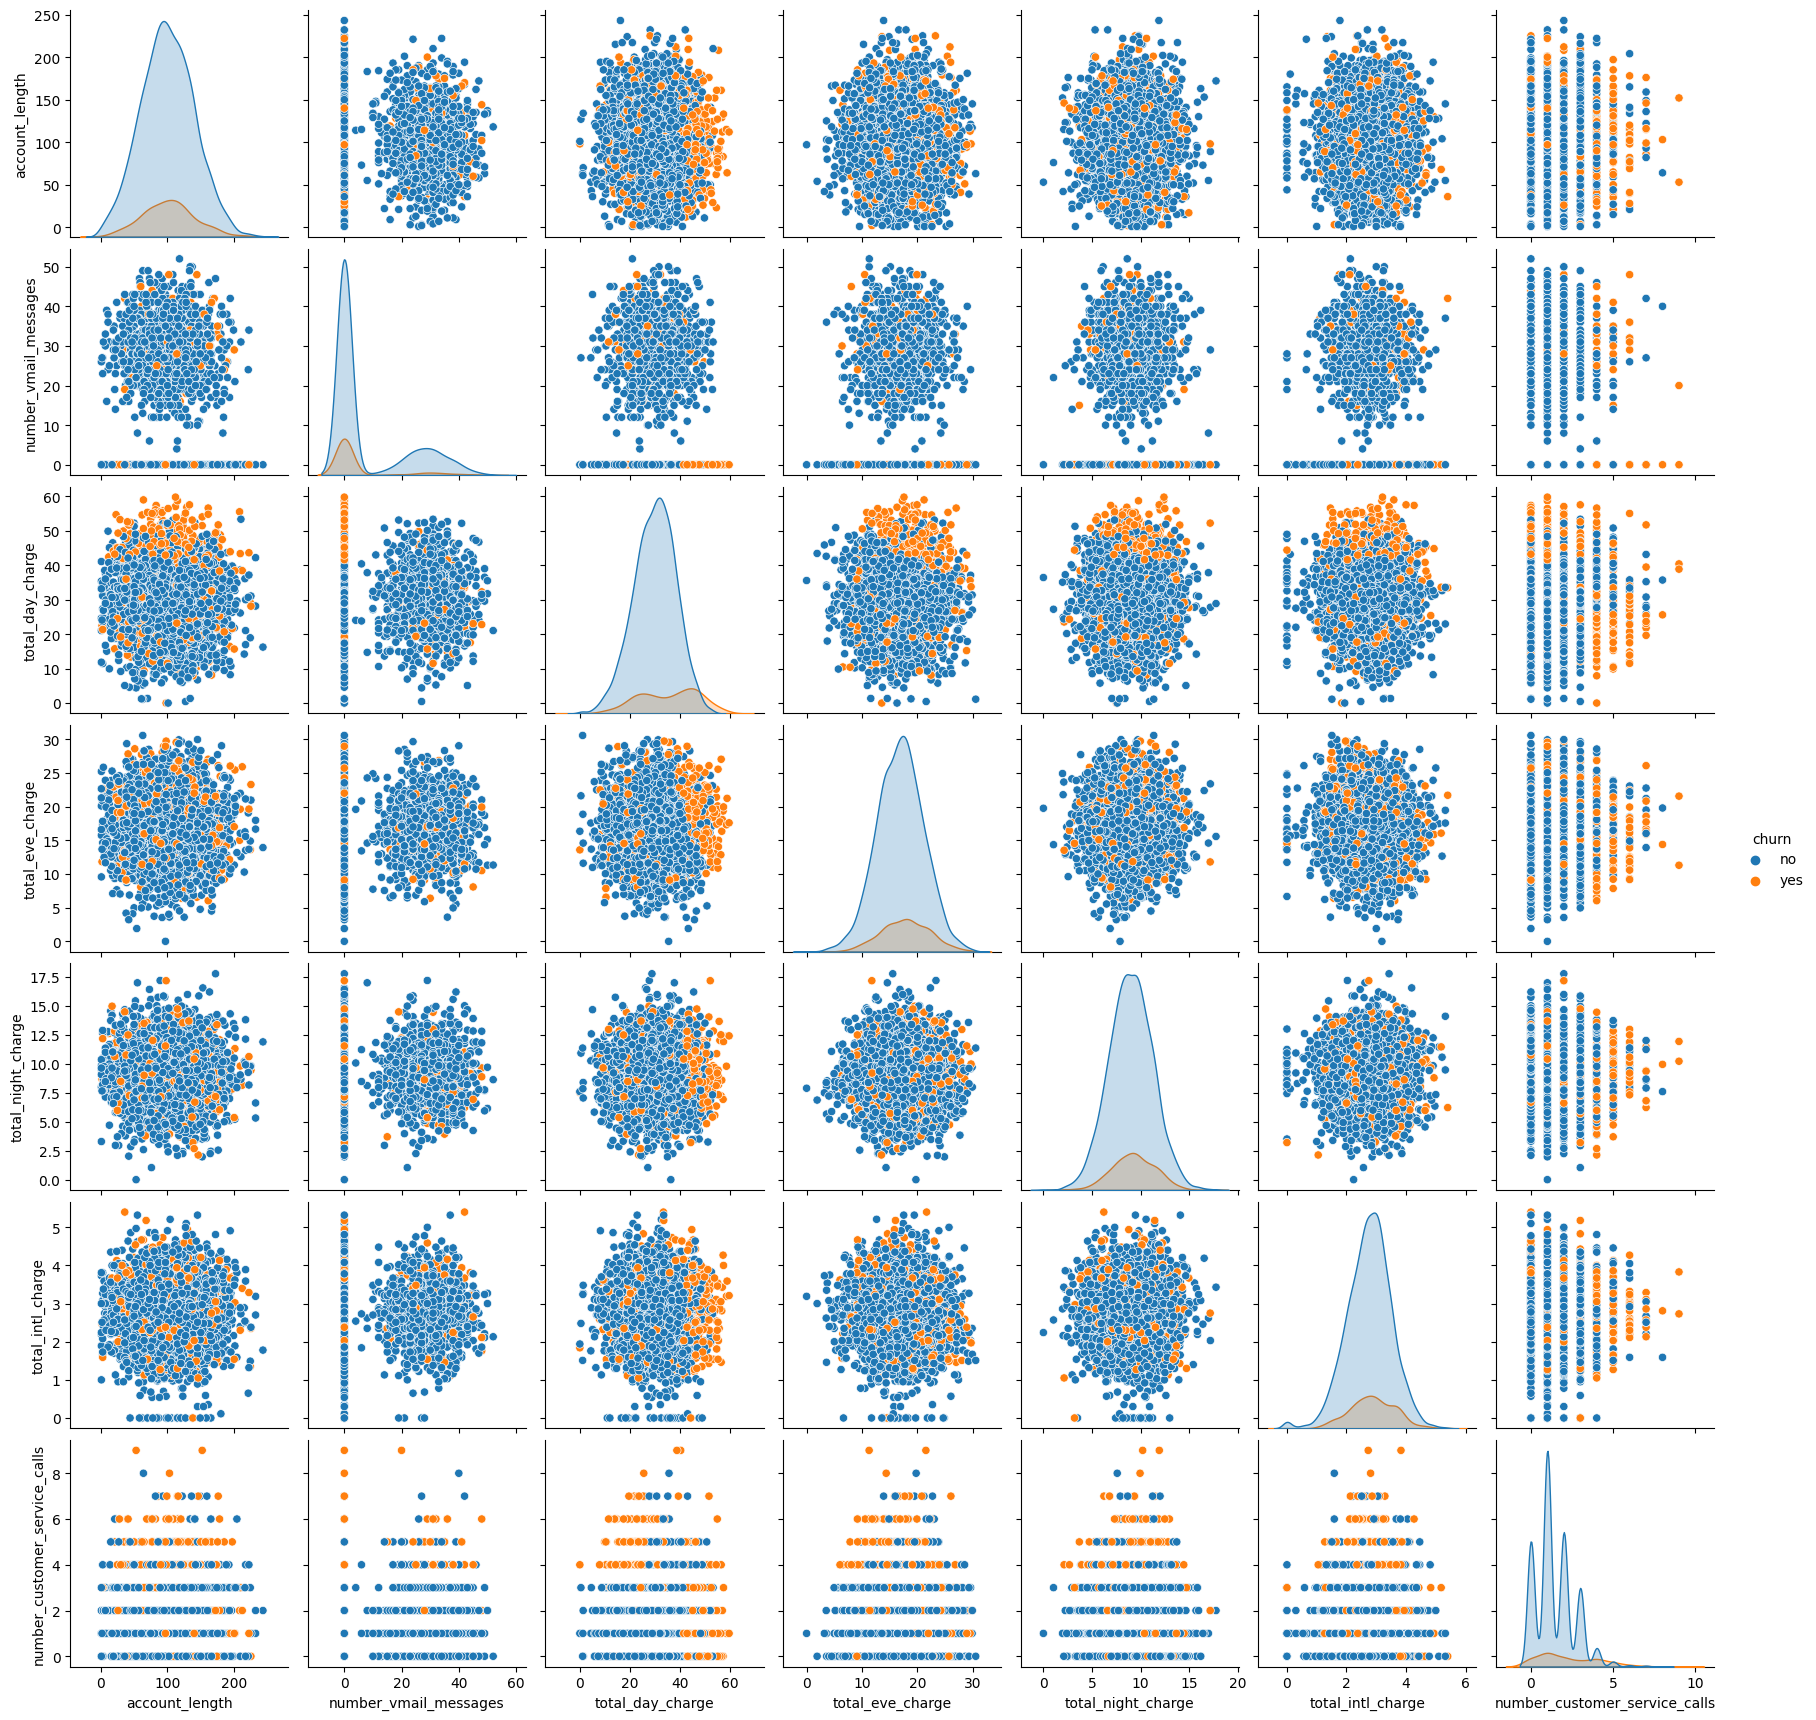

In [14]:
# Building paiplot on a few features
sns.pairplot(data,vars=['account_length','number_vmail_messages', 'total_day_charge',\
                            'total_eve_charge','total_night_charge', \
                            'total_intl_charge','number_customer_service_calls'],hue='churn')
plt.show()

**Observation:**

There is significant separation in the two classes for features like total-day_charge, Total_eve_charge, and number_vmail_messages.

### **(C) Correlation Matrix:**

<Axes: >

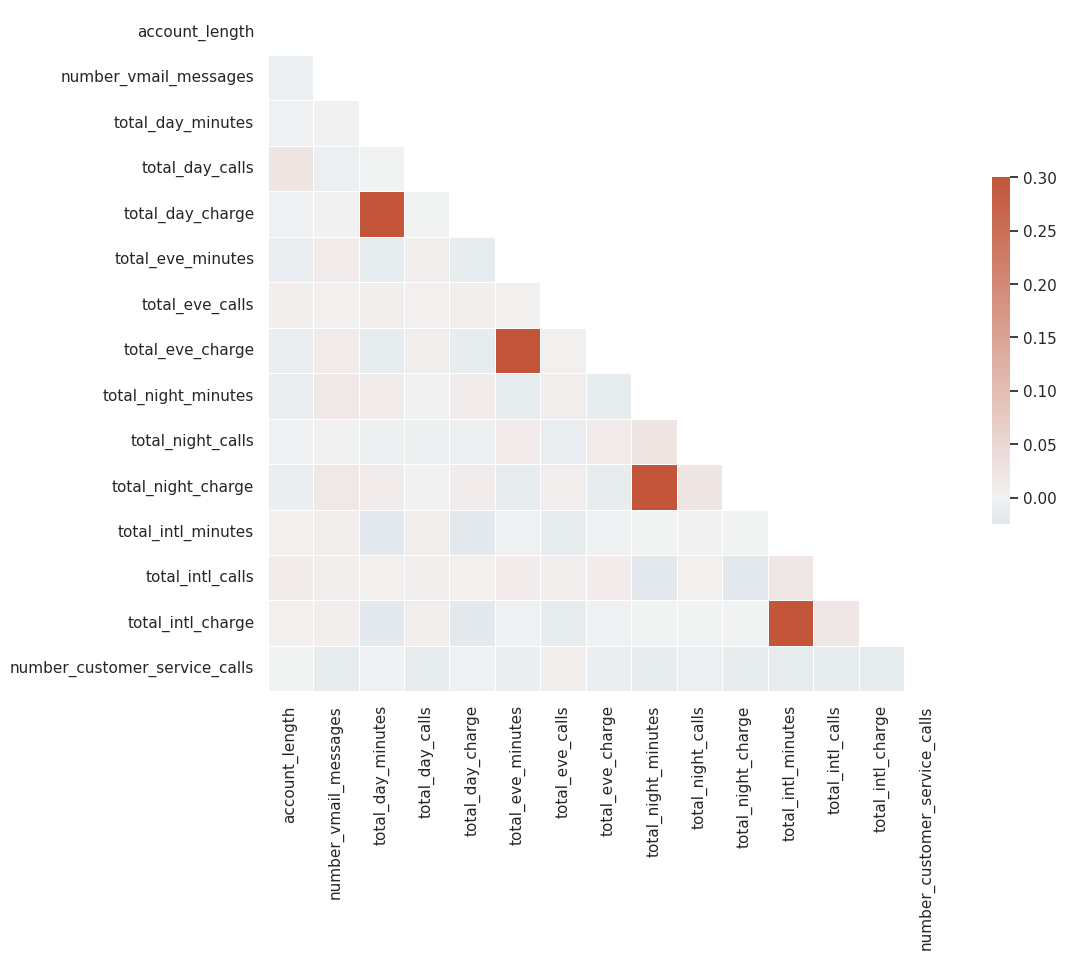

In [15]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

### **(D) Check individual features**

In [17]:
# Are there any customers who had voice message but didn't have a voice mail plan?
df[df['number_vmail_messages'] > 0]['voice_mail_plan'].unique()

array(['yes'], dtype=object)

In [18]:
# Are there any customers who made international calls without an international plan?
print(df[df['total_intl_calls'] > 0]['international_plan'].unique())

['no' 'yes']


In [19]:
num_cust_intl_calls_without_plan = len(df[(df['total_intl_calls'] > 0) & (df['international_plan'] == 'no')])
num_cust_made_intl_calls = len(df[df['total_intl_calls'] > 0])
print('Percentage of customers who made international calls but didn\'t have a plan: {:.2f}%'.format(num_cust_intl_calls_without_plan / num_cust_made_intl_calls * 100))

Percentage of customers who made international calls but didn't have a plan: 90.66%


Seems like the telecom provider didn't advertize its international call plan effectively.
91% of the customers calling internationally didn't take the plan.
But, it might be possible that most customers made international calls rarely, which would explain the no-plan scenario. Let's check the distribution of international call minutes.

<Axes: xlabel='total_intl_calls', ylabel='Count'>

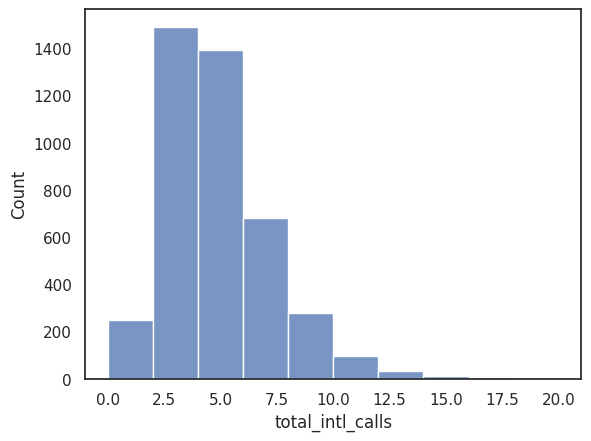

In [20]:
sns.histplot(df['total_intl_calls'], bins=10)

Most of the customer made 2-6 calls in total in their whole subscription period.
This explains the high 91% of customers making international calls without a plan.

## **Modeling**

The first thing that always needs to be done is to split the data into train and validation sets as it is a vital step to avoid overfitting, improve generalizability, and it helps us compare potential models. In this case we use stratified K-fold cross-validation as our dataset is highly imbalanced and we want to ensure the class distribution is consistent across folds.

In [21]:
# change the yes, No values in target column to zeros and ones.
df.churn.replace(['yes','no'],[1,0],inplace=True)

In [22]:
# Seperate the target variable from training features
Y = df['churn']
X = df.drop('churn', axis=1)

In [23]:
Y.shape

(4250,)

## **Preprocess**

In [24]:
def preprocess(df):
    # add new features
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    # target mapping
    df.churn.replace(['no', 'yes'], [0, 1], inplace=True)
    # target_mapping = {"no": 0, "yes": 1}
    # df.loc[:, 'churn'] = df['churn'].map(target_mapping)
    return df

# preprocess dataframe and add features
df = preprocess(df)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,611.5,329,55.54
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,527.2,328,59.00
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,558.2,248,65.02
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,501.9,356,49.36
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,118,9.57,7.5,7,2.03,3,0,779.3,314,76.28


## **Baseline model**

In [25]:
from sklearn.model_selection import StratifiedKFold

def stratKFold(df, n_splits=5):
    """
    Perform stratified K fold cross validation on training set
    :return: df with kfold column
    """
    # create new column 'kfold' with val -1
    df["kfold"] = -1
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    # initialise kfold class
    kf = StratifiedKFold(n_splits=n_splits)
    for fold, (train_index, valid_index) in enumerate(kf.split(X, Y)):
      # X_train, X_valid = X[train_index], X[valid_index]
      # y_train, y_valid = Y[train_index], Y[valid_index]
      df.loc[valid_index, "kfold"] = fold
    return df

df = stratKFold(df)

In [26]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,kfold
0,KS,36,area_code_510,no,no,0,178.6,83,30.36,213.1,...,8.91,10.9,5,2.94,1,0,589.7,305,57.38,0
1,MT,16,area_code_510,no,no,0,153.2,65,26.04,229.7,...,6.67,10.7,8,2.89,1,0,531.1,249,52.23,0
2,NE,99,area_code_415,no,no,0,200.0,66,34.00,107.9,...,10.52,11.4,2,3.08,3,0,541.6,252,53.69,0
3,OH,159,area_code_510,no,no,0,168.5,80,28.65,203.9,...,8.96,8.1,2,2.19,1,0,571.5,325,54.94,0
4,NY,77,area_code_510,no,no,0,124.1,92,21.10,214.9,...,10.86,13.7,3,3.70,0,0,580.3,355,50.23,0


In [27]:
df.kfold.nunique()

5

In [28]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.8-py3-none-any.whl size=145466 sha256=43d802f52bb74275017c7ee9196bda11d44ce934dc1d8c13a63d425ebd6caea0
  Stored in directory: /root/.cache/pip/wheels/7d/c3/96/9efd9f76

In [29]:
import mlflow
mlflow.set_experiment("mlflow/customer_churn_model")
from sklearn.metrics import f1_score, recall_score, precision_score
# scoring function
def score(y, preds):
    f1 = f1_score(y, preds)
    recall = recall_score(y, preds)
    precision = precision_score(y, preds)
    return [f1, recall, precision]

2023/10/03 20:21:04 INFO mlflow.tracking.fluent: Experiment with name 'mlflow/customer_churn_model' does not exist. Creating a new experiment.


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# baseline model
f1_scores, recall_scores, precision_scores = [], [], []
for fold in range(5):
    # define train and validation set
    features = ["total_day_minutes", "number_customer_service_calls"]
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # target and features
    y_train = df_train['churn'].values
    y_valid = df_valid['churn'].values
    # init and fit scaler
    scaler = StandardScaler()
    x_train = scaler.fit_transform(df_train[features])
    x_valid = scaler.transform(df_valid[features])
    # create and train model
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    preds = clf.predict(x_valid)
    # score model
    scores = score(y_valid, preds)
    f1_scores.append(scores[0])
    recall_scores.append(scores[1])
    precision_scores.append(scores[2])
# average scores over each fold
f1_avg = np.average(f1_scores)
recall_avg = np.average(recall_scores)
precision_avg = np.average(precision_scores)
print(f"Average F1 = {f1_avg}, Recall = {recall_avg}, Precision = {precision_avg}")

# log metrics on mlflow
with mlflow.start_run(run_name="lr_baseline") as mlops_run:
        mlflow.log_metric("F1", f1_avg)
        mlflow.log_metric("Recall", recall_avg)
        mlflow.log_metric("Preision", precision_avg)

Average F1 = 0.09407299318781845, Recall = 0.05254462041226747, Precision = 0.46759906759906755


The results aren't great. This was only a baseline! We can try a few things to improve our model:

We can balance out our classes by over and under-sampling as the imbalance is causing bias towards the majority class in our model.
We can train on more features.

## **SMOTE: To Over-Sample the Minority Class**

In [31]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
total_minutes                    float64
total_calls                        int64
total_charge                     float64
kfold                              int64
dtype: object

In [32]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from mlxtend.feature_selection import ColumnSelector

In [33]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn',
 'total_minutes',
 'total_calls',
 'total_charge',
 'kfold']

In [34]:
def feature_pipeline():
  numerical_features = [col for col in df.select_dtypes(include=['int64','float64']).columns if col not in ["churn", "kfold"]]
  categorical_features = df.select_dtypes(include = 'object').columns.tolist()
  # transformers
  transforms = []
  # categorical pipeline
  transforms.append(
        (
            "categorical",
            Pipeline(
                [
                    ("select", ColumnSelector(cols=categorical_features)),
                    ("encode", OneHotEncoder()),
                ]
            ),
        )
    )

    # numeric pipeline
  transforms.append(
        (
            "numeric",
            Pipeline(
                [
                    ("select", ColumnSelector(cols=numerical_features)),
                    ("impute", SimpleImputer(missing_values=np.nan, strategy="median")),
                ]
            ),
        )
    )

  # combine features
  features = FeatureUnion(transforms)
  return features

In [35]:
feature_pipeline()

FeatureUnion(transformer_list=[('categorical',
                                Pipeline(steps=[('select',
                                                 ColumnSelector(cols=['state',
                                                                      'area_code',
                                                                      'international_plan',
                                                                      'voice_mail_plan'])),
                                                ('encode', OneHotEncoder())])),
                               ('numeric',
                                Pipeline(steps=[('select',
                                                 ColumnSelector(cols=['account_length',
                                                                      'number_vmail_messages',
                                                                      'total_day_minutes',
                                                                      'total_day_calls',
                                                                      'total_day_charge',
                                                                      'total_eve_minutes',
                                                                      'total_eve_calls',
                                                                      'total_eve_charge',
                                                                      'total_night_minutes',
                                                                      'total_night_calls',
                                                                      'total_night_charge',
                                                                      'total_intl_minutes',
                                                                      'total_intl_calls',
                                                                      'total_intl_charge',
                                                                      'number_customer_service_calls',
                                                                      'total_minutes',
                                                                      'total_calls',
                                                                      'total_charge'])),
                                                ('impute',
                                                 SimpleImputer(strategy='median'))]))])

In [36]:
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer

# # Define the numerical features
# numerical_features = numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['churn'])

# # Initialize CountVectorizer instances for categorical features
# categorical_features = {
#     'state': CountVectorizer(),
#     'area_code': CountVectorizer(),
#     'international_plan': CountVectorizer(),
#     'voice_mail_plan': CountVectorizer()
# }

# # Create a list of transformers for each feature type
# transformers = [
#     ('numerical', StandardScaler(), numerical_features)
# ]

# # Transform and store categorical features for train data
# categorical_transformed = {}
# for feature, vectorizer in categorical_features.items():
#     categorical_transformed[feature] = vectorizer.fit_transform(X[feature].values)

# # # Transform and store categorical features for test data using the same vectorizer
# # categorical_test_transformed = {}
# # for feature, vectorizer in categorical_features.items():
# #     categorical_test_transformed[feature] = vectorizer.transform(x_test[feature].values)

# # Create a ColumnTransformer to apply the transformers
# preprocessor = ColumnTransformer(
#     transformers=transformers,
#     remainder='passthrough'  # Pass through any other columns not specified
# )

# # Create the pipeline
# pipeline = Pipeline([
#     ('preprocessor', preprocessor)
# ])

# # Fit and transform the training data
# x_transformed = pipeline.fit_transform(X)


# # Concatenate the transformed categorical features for both train and test data
# for feature in categorical_features.keys():
#     x_transformed = np.concatenate((x_transformed, categorical_transformed[feature].toarray()), axis=1)
#     # x_test_transformed = np.concatenate((x_test_transformed, categorical_test_transformed[feature].toarray()), axis=1)


In [37]:
from imblearn.over_sampling import SMOTE, SMOTENC
def train(fold, df, model=LogisticRegression(solver='newton-cg'), smote=False):

    # feature pipeline
    features = feature_pipeline()

    # define train and validation set
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # target and features
    y_train = df_train['churn'].values
    y_valid = df_valid['churn'].values

    # create training and validation features
    x_train = features.fit_transform(df_train)
    x_valid = features.transform(df_valid)

    # smote
    if smote:
        smt = SMOTE(random_state=42, sampling_strategy=smote)
        x_train, y_train = smt.fit_resample(x_train, y_train)

    # create and train model
    clf = model
    clf.fit(x_train, y_train)
    preds = clf.predict(x_valid)
    # score model
    scores = score(y_valid, preds)
    return scores, [y_valid, preds]

In [38]:
f1_scores, recall_scores, precision_scores = [], [], []
for fold in range(5):
    scores, _ = train(fold,df, smote=False)
    f1, recall, precision = scores
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
# average scores over each fold
f1_avg = np.average(f1_scores)
recall_avg = np.average(recall_scores)
precision_avg = np.average(precision_scores)
print(f"Average F1 = {f1_avg}, Recall = {recall_avg}, Precision = {precision_avg}")
# log metrics on mlflow
with mlflow.start_run(run_name="lr_all_features") as mlops_run:
        mlflow.log_metric("F1", f1_avg)
        mlflow.log_metric("Recall", recall_avg)
        mlflow.log_metric("Preision", precision_avg)

Average F1 = 0.3367520826461914, Recall = 0.23811925411190119, Precision = 0.5818612815755673


The results are definitely better than before but still not great. We've waited long enough, let's try using SMOTE! We are going to use SMOTE to over-sample our churn datapoints so that we end up with equal class distributions.

In [39]:
def train_and_eval(df, model=LogisticRegression(solver='newton-cg'), smote=0.75, model_name="", params = {}, log_mlflow=True):
    f1_scores, recall_scores, precision_scores = [], [], []
    for fold in range(5):
        scores, _ = train(fold, df, model=model, smote=smote)
        f1, recall, precision = scores
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)
    # average scores over each fold
    f1_avg = np.average(f1_scores)
    recall_avg = np.average(recall_scores)
    precision_avg = np.average(precision_scores)
    print(f"Average F1 = {f1_avg}, Recall = {recall_avg}, Precision = {precision_avg}")
    # log metrics on mlflow
    if log_mlflow:
        with mlflow.start_run(run_name=model_name) as mlops_run:
                mlflow.log_metric("F1", f1_avg)
                mlflow.log_metric("Recall", recall_avg)
                mlflow.log_metric("Preision", precision_avg)
                if params:
                    mlflow.log_params(params)
    return f1_avg

When using SMOTE, we need to evaluate performance on a validation set which has not been over-sampled. Otherwise, we will not be getting a true performance measure.

In [40]:
train_and_eval(df, model_name="lr_all_features_smote")

Average F1 = 0.49144878908324613, Recall = 0.6645865429505136, Precision = 0.3904572145077182


0.49144878908324613

We have boosted the F1 score from 0.33 to 0.49, and the recall has gone from 0.23 to 0.67! An important note is that the precision has practically stayed the same. Mathematically, precision the number of true positives divided by the number of true positives plus the number of false positives. It tells us that our model is correct 47% of the time when trying to predict positive samples. So by over-sampling we have decreased the number of false negatives but we have also increased the number of false positives. This is OK as we decided we will favor false positives over false negatives. An intuitive way to see this change is by looking at a confusion matrix.

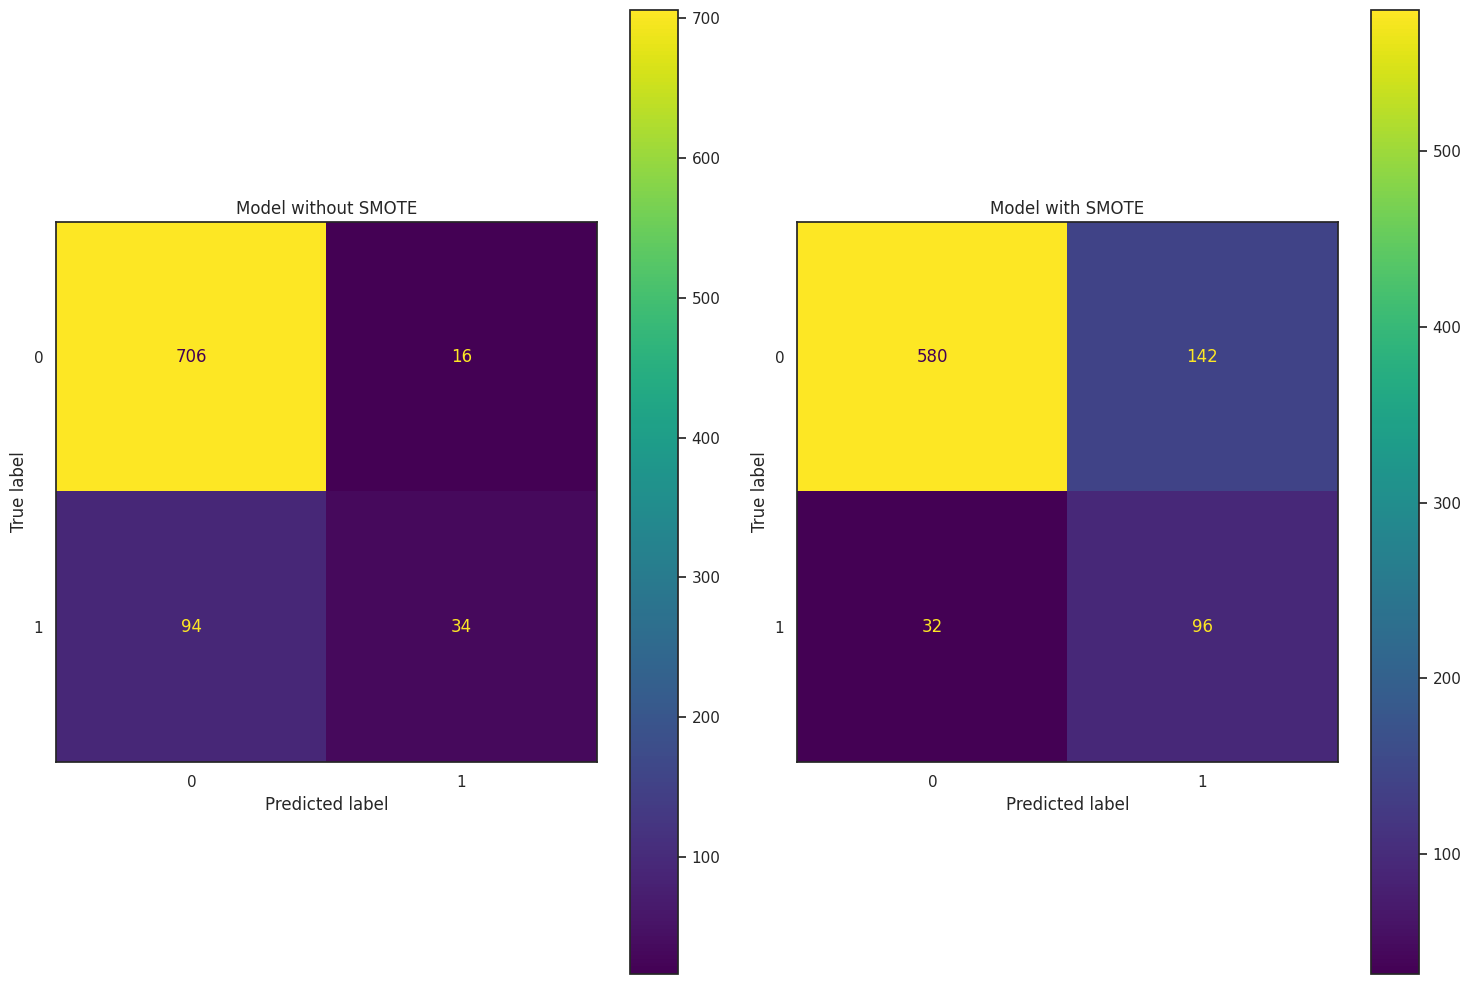

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# get preds for non-smote and smote models
_, evals = train(0, df, smote=False)
_, evals_smote = train(0, df, smote=True)
# set axis and plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax1.set_title("Model without SMOTE")
ConfusionMatrixDisplay.from_predictions(*evals, ax=ax1)
ax2.set_title("Model with SMOTE")
ConfusionMatrixDisplay.from_predictions(*evals_smote, ax=ax2)
plt.tight_layout()
plt.show()

 FP and FN rates can be tuned using the probability threshold and the easiest way to compare the two models is to compare F1 scores.

## **Feature Selection**

We can train a more complicated model and then use this to select features. Specifically, we train a random forest classifier and then use SHAP values to select the most promising features. Narrowing down the feature space helps reduce dimensionality and generalizability while also making interpreting results easier.

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature. Where could we use this?

A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection.

So, basically SHAP values provide a way to explain the "importance" or contribution of each feature to a specific prediction.

In [42]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.3 MB/s eta 0:00:00


In [43]:
from sklearn.ensemble import RandomForestClassifier
features = feature_pipeline()
X = np.asarray(features.fit_transform(df).todense())
y = df['churn'].values

clf = RandomForestClassifier()
model = clf.fit(X,y)

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [44]:
num_features = [col for col in df.select_dtypes(include=['int64','float64']).columns if col not in ["churn", "kfold"]]
cat_features = df.select_dtypes(include = 'object').columns.tolist()

In [45]:
features.transformer_list # features

[('categorical',
  Pipeline(steps=[('select',
                   ColumnSelector(cols=['state', 'area_code',
                                        'international_plan',
                                        'voice_mail_plan'])),
                  ('encode', OneHotEncoder())])),
 ('numeric',
  Pipeline(steps=[('select',
                   ColumnSelector(cols=['account_length', 'number_vmail_messages',
                                        'total_day_minutes', 'total_day_calls',
                                        'total_day_charge', 'total_eve_minutes',
                                        'total_eve_calls', 'total_eve_charge',
                                        'total_night_minutes',
                                        'total_night_calls', 'total_night_charge',
                                        'total_intl_minutes', 'total_intl_calls',
                                        'total_intl_charge',
                                        'number_customer_service

In [46]:
cat_features = features.transformer_list[0][1][1].get_feature_names_out(cat_features)

In [47]:
feature_names = list(cat_features) + list(num_features)

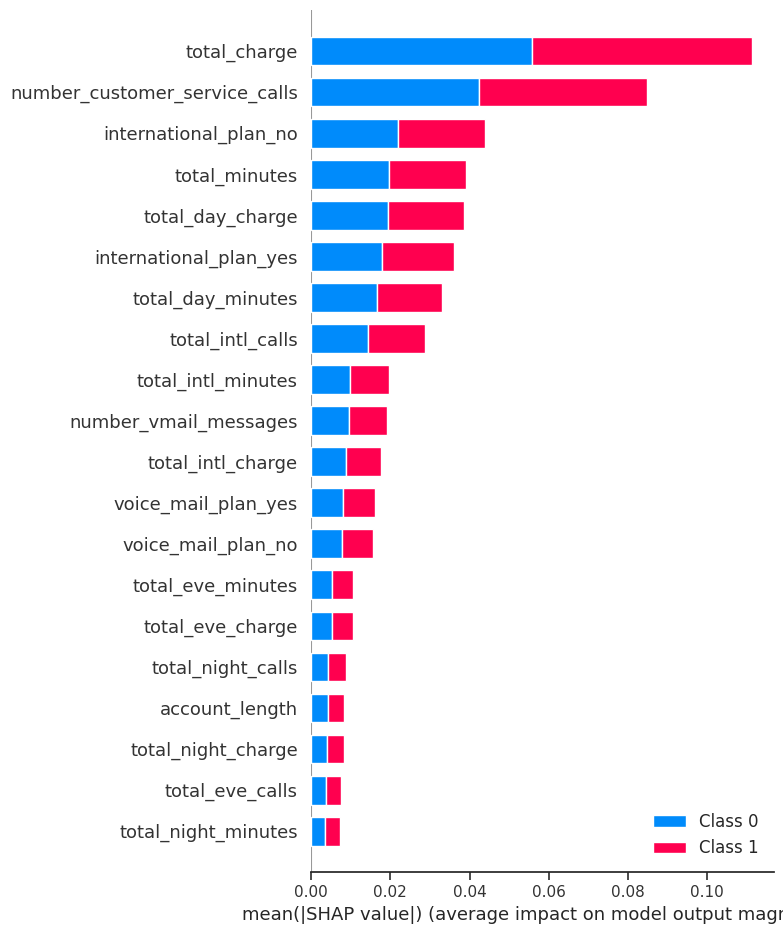

In [48]:
shap.summary_plot(shap_values, features=X, feature_names=feature_names, plot_type='bar')

In [49]:
features_keep = [
    'total_charge', 'number_customer_service_calls', 'international_plan', 'total_day_minutes', 'total_day_charge',
    'total_minutes', 'total_intl_calls', 'voice_mail_plan', 'total_intl_minutes', 'number_vmail_messages', 'total_intl_charge'
]

We can now define a new pipeline to preprocess and only select our needed features.

In [50]:
def feature_pipeline():
    """
    :return: preprocessing feature pipeline with selected features
    """
    # different features
    numeric_features = [
        'total_charge', 'number_customer_service_calls', 'total_day_minutes', 'total_day_charge',
        'total_minutes', 'total_intl_calls', 'total_intl_minutes', 'number_vmail_messages', 'total_intl_charge'
    ]
    cat_features = ['international_plan', 'voice_mail_plan']

    # transformers
    transforms = []

    transforms.append(
        (
            "binary",
            Pipeline(
                [
                    ("select", ColumnSelector(cols=cat_features)),
                    ("encode", OrdinalEncoder()),
                ]
            ),
        )
    )
    # numeric pipeline
    transforms.append(
        (
            "numeric",
            Pipeline(
                [
                    ("select", ColumnSelector(cols=numeric_features)),
                    ("impute", SimpleImputer(missing_values=np.nan, strategy="median")),
                ]
            ),
        )
    )

    # combine features
    features = FeatureUnion(transforms)
    return features

In [51]:
train_and_eval(df, model_name="lr_selected_features_smote")

Average F1 = 0.49968717506545585, Recall = 0.692061853587589, Precision = 0.39161827092625684


0.49968717506545585

We've removed features and our performance increases slightly. This confirms to us that the other features weren't important.

Our goal is to build an interpretable model that we can use to try and keep customers from leaving. Decision tree classifiers are very interpretable as well.

In [52]:
from sklearn.tree import DecisionTreeClassifier
train_and_eval(df, model=DecisionTreeClassifier(), model_name="dt_selected_features_smote")

Average F1 = 0.8186539495681222, Recall = 0.8473540185304891, Precision = 0.7925411831344318


0.8186539495681222

It does well! We need to be very careful though as decision trees overfit. So, tuning hyperparameters on both models to see if we can optimize things a little more seems a better choice.

Decision trees are very prone to overfitting and this is why random forest models are usually preferred. The random forest can generalize over the data in a better way as the randomized feature selection acts as a form of regularization. But here we care more about interpretability than performance. Now, although cross-validation is great for seeing how the model is generalizing, it doesn't necessarily prevent overfitting as we will just end up overfitting the validation sets.

Model performance is estimated in terms of its accuracy to predict the occurrence of an event on unseen data. A more accurate model is seen as a more valuable model. Model interpretability provides insight into the relationship between in the inputs and the output.


* One measure of overfitting is when the training score is much higher than the testing score. I initially tried setting the objective function in the Optuna trial to the cross-validated validation scores but this still lead to overfitting as DTs don't have much regularization.
* Another possibility, that is this case worked well, is weighting the difference between cross-validated training scores and validation scores vs the validation score itself.

In [53]:
def train_valid_f1_score(mean_train, mean_test):
    '''
    RMSE of the difference between testing and training is weighted four times less than the test accuracy
    '''
    return np.sqrt((mean_test - mean_train)**2) + 4 * (1 - mean_test)

* (mean_test - mean_train)**2: This part computes the squared difference between the accuracy (mean) on the test set and the accuracy on the training set. Squaring the difference ensures that the score increases as the difference between train and test accuracy increases. Essentially, it penalizes models that overfit (high training accuracy but low test accuracy).
* 4 * (1 - mean_test): This part represents four times the complement of the accuracy on the test set. The complement of the accuracy is (1 - accuracy), so this component is essentially a penalty for low test accuracy. Multiplying by 4 gives it higher weight in the final score.
* np.sqrt(...): Finally, the square root of the sum of the squared difference and the penalty for low test accuracy is taken. This square root operation ensures that the resulting score is a non-negative value.



The purpose of this custom scoring function is to strike a balance between training accuracy and test accuracy, penalizing models that overfit (high training accuracy but low test accuracy) while also considering the overall test accuracy.

We can use this scoring function when evaluating machine learning models to prioritize models that generalize well to the test data and avoid overfitting. Depending on the specific problem and goals, we may adjust the weights or components of the formula to give more or less importance to different aspects of model performance.

In [54]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 3.2 MB/s eta 0:00:00


In [55]:
from optuna import Trial, create_study
from optuna.samplers import TPESampler
from scipy.stats import loguniform

def objective(trial, n_jobs=-1, random_state=42):
    '''
    Objective function to optimize our custom metric using Optuna's TPE sampler
    '''
    # smote param space
    smote_space = {'sampling_strategy': trial.suggest_uniform('sampling_strategy', 0.5, 1)}
    # define search spaces
    if model == LogisticRegression:
        params = {
            'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
            'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
            'C': trial.suggest_float("C", 1.0, 10.0, log=True),
            'tol': trial.suggest_float("tol", 0.0001, 0.01, log=True),
            'max_iter': trial.suggest_int('max_iter', 100, 1000)

        }
    else:
        params = {
            'max_depth': trial.suggest_int('max_depth',2,10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,30),
            'min_samples_split': trial.suggest_int('min_samples_split',2,10),
            'criterion': trial.suggest_categorical('criterion', ["gini", "entropy"])
        }

    # feature pipeline
    features = feature_pipeline()
    # create training and validation features
    X = features.fit_transform(df)
    y = df['churn'].values

    train_f1, valid_f1 = [], []
    # Create StratifiedKFold object.
    strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in strat.split(X, y):
        # split data
        x_train, x_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        # feature transformations and smote
        smt = SMOTE(random_state=42, **smote_space)
        x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
        # train model
        clf = model(**params)
        clf.fit(x_train_smt, y_train_smt)
        # compute f1 score on valid and training data (without SMOTE!)
        preds_train = clf.predict(x_train)
        preds_valid = clf.predict(x_valid)
        train_f1.append(f1_score(y_train, preds_train))
        valid_f1.append(f1_score(y_valid, preds_valid))
    # compute mean of f1 train/valid scores
    train_f1_mean, valid_f1_mean = np.array(train_f1).mean(), np.array(valid_f1).mean()
    # train/test cross score
    return train_valid_f1_score(train_f1_mean, valid_f1_mean)

In [56]:
# model to optimize
model = DecisionTreeClassifier

# Bayesian sampler
sampler = TPESampler()
study = create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=100)

# display params
best = study.best_params
for key, value in best.items():
    print(f"{key:>20s} : {value}")
print(f"{'best objective value':>20s} : {study.best_value}")

[I 2023-10-03 20:23:34,740] A new study created in memory with name: no-name-18f0239f-26dc-4f98-8d7f-d63a3e82d3b4
[I 2023-10-03 20:23:35,252] Trial 0 finished with value: 0.47219799800485707 and parameters: {'sampling_strategy': 0.6558116097809541, 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 9, 'criterion': 'entropy'}. Best is trial 0 with value: 0.47219799800485707.
[I 2023-10-03 20:23:35,767] Trial 1 finished with value: 0.4989206916434952 and parameters: {'sampling_strategy': 0.8852410096738382, 'max_depth': 8, 'min_samples_leaf': 13, 'min_samples_split': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.47219799800485707.
[I 2023-10-03 20:23:36,136] Trial 2 finished with value: 1.2545542100985712 and parameters: {'sampling_strategy': 0.6775901330435171, 'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 6, 'criterion': 'gini'}. Best is trial 0 with value: 0.47219799800485707.
[I 2023-10-03 20:23:36,438] Trial 3 finished with value: 1.52630137447240

   sampling_strategy : 0.5278861413692945
           max_depth : 7
    min_samples_leaf : 3
   min_samples_split : 3
           criterion : entropy
best objective value : 0.4064635436455355


In [57]:
def train(df, model, params, sampling_strategy):
    '''
    Train model and output both training and validation f1 scores
    :param df: pandas dataframe of our data
    :param model: model to train
    :param params: dict, model hyperparams
    :param sampling_strategy: float, sampling strat for SMOTE
    :return: prints training and validation F1 scores
    '''
    # feature pipeline
    features = feature_pipeline()
    # create training and validation features
    X = features.fit_transform(df)
    y = df['churn'].values

    train_f1, valid_f1 = [], []
    # Create StratifiedKFold object.
    strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in strat.split(X, y):
        # split data
        x_train, x_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        # feature transformations and smote
        smt = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
        # train model
        clf = model(**params)
        clf.fit(x_train_smt, y_train_smt)
        # compute f1 score on valid and training data (without SMOTE!)
        preds_train = clf.predict(x_train)
        preds_valid = clf.predict(x_valid)
        train_f1.append(f1_score(y_train, preds_train))
        valid_f1.append(f1_score(y_valid, preds_valid))
    # compute mean of f1 train/valid scores
    train_f1_mean, valid_f1_mean = np.array(train_f1).mean(), np.array(valid_f1).mean()
    # train/test cross score
    print(f"Average training F1 score {train_f1_mean}")
    print(f"Average validation F1 score {valid_f1_mean}")
    print(f"Overfit score {train_valid_f1_score(train_f1_mean, valid_f1_mean)}")

In [58]:
params = {'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 5, 'criterion': 'gini'}
train(df, DecisionTreeClassifier, params, 0.85)

Average training F1 score 0.9050844364652424
Average validation F1 score 0.8831029677186051
Overfit score 0.489569597872217


Although this model looks great and doesn't appear to be overfitting we are going to go with the model below that has been tuned with a lower maximum depth. Our goal is interpretability and a depth of 6 doesn't really give us that. So we are sacrificing a little bit of accuracy for interpretability.

In [59]:
params = {'max_depth': 4, 'min_samples_leaf': 18, 'min_samples_split': 17, 'criterion': 'entropy'}
train(df, DecisionTreeClassifier, params, 0.70)

Average training F1 score 0.8262885880687538
Average validation F1 score 0.8199984319292504
Overfit score 0.726296428422502


In [60]:
with mlflow.start_run(run_name="dt_tuned") as mlops_run:
        mlflow.log_metric("F1", 0.8161)

## **Pruning the Decision Tree**
Pruning is a technique that removes the parts of the Decision Tree which prevent it from growing to its full depth. The parts that it removes from the tree are the parts that do not provide the power to classify instances.


We do this with the hope that this helps our model generalize better. An added bonus, that tends to come with most regularization, is that it also helps improve the interpretability of the model.

In [61]:
def train_full(df, model, params, smote=0.78):
    """
    train model on whole dataset
    :param df: pandas dataframe containing our data
    :param model: model to train data on
    :param params: dict, model hyperparameters
    :return: trained model and feature transformation pipeline
    """
    # feature pipeline
    features = feature_pipeline()

    # target and features
    x_train = features.fit_transform(df)
    y_train = df['churn'].values

    smt = SMOTE(random_state=42, sampling_strategy=smote)
    x_train, y_train = smt.fit_resample(x_train, y_train)

    # create and train model
    clf = model(**params)
    clf.fit(x_train, y_train)
    return clf, features

In [62]:
# train full model
params = {'max_depth': 4, 'min_samples_leaf': 18, 'min_samples_split': 17, 'criterion': 'entropy'}
clf, features = train_full(df=df, model=DecisionTreeClassifier, params=params)

In [63]:
# get cost complexity alphas from model
ccp_alphas = clf.cost_complexity_pruning_path(x_train, y_train)['ccp_alphas']
ccp_alphas

array([0.        , 0.00058426, 0.00059309, 0.00102157, 0.00112042,
       0.0019927 , 0.00322822, 0.00411534, 0.00713252, 0.00800293,
       0.02386822, 0.06450544])

We can then score each of these alpha values in a cross-validated way to find the best complexity to choose.

In [64]:
def search_alpha_space(alphas, df=df):
    '''
    Cross validated scoring of each ccp_alpha
    :param alphas: list, ccp_alphas from trained model
    :param df: pandas dataframe
    :return: dict, of alphas and avergae corresponding validation F1 score
    '''
    # optimized parameters
    params = {'max_depth': 4, 'min_samples_leaf': 18, 'min_samples_split': 17, 'criterion': 'entropy'}
    sampling_strategy = 0.78

    # feature pipeline
    features = feature_pipeline()
    # create training and validation features
    X = features.fit_transform(df)
    y = df['churn'].values

    f1 = {}
    # Create StratifiedKFold object.
    strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for alpha in alphas:
        score = []
        for train_index, test_index in strat.split(X, y):
            # split data
            x_train, x_valid = X[train_index], X[test_index]
            y_train, y_valid = y[train_index], y[test_index]
            # feature transformations and smote
            smt = SMOTE(random_state=42, sampling_strategy=0.78)
            x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
            # train model
            clf = DecisionTreeClassifier(ccp_alpha=alpha, **params)
            clf.fit(x_train_smt, y_train_smt)
            # compute f1 score on valid and training data (without SMOTE!)
            preds_valid = clf.predict(x_valid)
            score.append(f1_score(y_valid, preds_valid))
        f1[f'{alpha}'] = np.array(score).mean()
    return f1

optim_alpha = search_alpha_space(ccp_alphas)

# print scored alphas
from pprint import pprint
pprint(optim_alpha)

{'0.0': 0.816103270284813,
 '0.0005842647910331844': 0.816103270284813,
 '0.0005930920192462885': 0.816103270284813,
 '0.0010215699493646285': 0.816103270284813,
 '0.0011204192846088687': 0.816103270284813,
 '0.0019927001338321468': 0.816103270284813,
 '0.003228215942898363': 0.816103270284813,
 '0.004115342762907176': 0.816103270284813,
 '0.0071325161189179365': 0.8142671700825213,
 '0.008002933020197112': 0.8147206576154481,
 '0.023868223077443323': 0.7667293021998818,
 '0.06450543630860262': 0.6540410407393117}


We can see that the value  alpha = 0.008002933 is the best complexity to choose. In general, as increases the number of nodes and depth decreases. So we pick the highest alpha value that still has a good average F1 score.

In [65]:
params = {'max_depth': 4, 'min_samples_leaf': 18, 'min_samples_split': 17, 'criterion': 'entropy', 'ccp_alpha': 0.00811411}
clf, features = train_full(df=df, model=DecisionTreeClassifier, params=params)

## **Performance on test data**

In [66]:
# load in test data and score
df_test = pd.read_csv('/content/drive/MyDrive/CustomerChurn/test.csv')

In [67]:
df_test.shape

(750, 20)

In [68]:
def preprocess(df):
    '''
    Preprocessing unseen data by adding features and mapping target variable
    :param df: pandas dataframe
    :param target: str, default False but if true and a string then map target to binary
    :return: processed dataframe
    '''
    # add new features
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    return df

def predict(X, clf, feature_pipeline, thresh=0.5):
    '''
    Predict customer churn on new data
    :param X: data containing features
    :param clf: trained model
    :param feature_pipeline: trained feature processing pipeline
    :param thresh: prediction threshold
    :return: predictions
    '''
    X = feature_pipeline.transform(X)
    preds = (clf.predict_proba(X)[:,1] >= thresh).astype(int)
    return preds
# load in test data and score
df_test = pd.read_csv('/content/drive/MyDrive/CustomerChurn/test.csv')
# preprocess data
df_test = preprocess(df_test)
# predict on unseen data
preds = predict(df_test, clf, features)

In [69]:
len(preds)

750

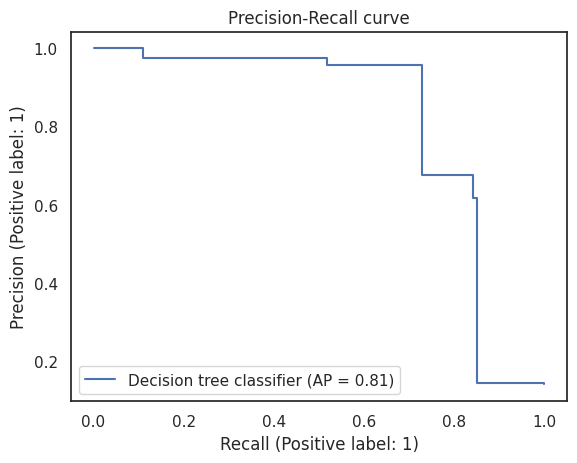

In [70]:
from sklearn.metrics import PrecisionRecallDisplay
# training data
x_train = features.transform(df)
y_train = df['churn'].values
# precision recall curve
display = PrecisionRecallDisplay.from_estimator(
    clf, x_train, y_train, name="Decision tree classifier"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [76]:
submit = pd.DataFrame({'id':df_test['id'], 'churn':preds})
submit.churn.replace([0,1],['no','yes'], inplace=True)
submit.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [77]:
submit.to_csv('churn_submit.csv',index=False)